In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
path_for_images = '/content/drive/MyDrive/Dataset_T/images.npy'
data = np.load(path_for_images)
data.shape

(4750, 128, 128, 3)

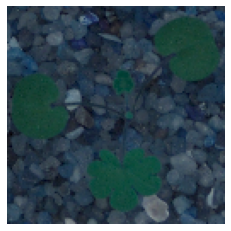

In [ ]:
plt.axis('off')
plt.imshow(data[1])

In [ ]:
labels_dict = {
    
    'Black-grass' : 0,
    'Charlock' : 1, 
    'Cleavers' : 2, 
    'Common Chickweed' : 3, 
    'Common wheat' : 4,
    'Fat Hen' : 5,
    'Loose Silky-bent' : 6,
    'Maize' : 7,
    'Scentless Mayweed' : 8,
    'Shepherds Purse' : 9,
    'Small-flowered Cranesbill' : 10,
    'Sugar beet' : 11
}

In [ ]:
path_for_label = '/content/drive/MyDrive/Dataset_T/label.csv'
label = pd.read_csv(path_for_label)
label = label.replace(labels_dict)
label


,Labels
0,10
1,10
2,10
3,10
4,10
...,...
4745,6
4746,6
4747,6
4748,6


In [ ]:
X = data
y = label.iloc[:,-1]
y = np.array(y)
print(X.shape, y.shape)

(4750, 128, 128, 3) (4750,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
print(X_train.shape, y_train.shape)

(3800, 128, 128, 3) (3800,)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

y_train


array([3, 4, 7, ..., 5, 4, 6])

In [ ]:
model_cnn = Sequential([
                        layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (128, 128, 3)),
                        layers.experimental.preprocessing.RandomRotation(0.1),
                        layers.experimental.preprocessing.RandomZoom(0.1),
                        
                        layers.Conv2D(16, (3,3), padding= 'same', activation='relu'),
                        layers.MaxPooling2D(),
                        layers.Conv2D(32, (3,3), padding= 'same', activation='relu'),
                        layers.MaxPooling2D(),
                        layers.Conv2D(64, (3,3), padding= 'same', activation='relu'),
                        layers.MaxPooling2D(),
                        layers.Dropout(0.2),

                        layers.Flatten(),

                        layers.Dense(128, activation='relu'),
                        layers.Dense(12, activation='softmax')

])

model_cnn.compile(optimizer = 'adam',
                  loss  = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics = 'accuracy')

In [ ]:
model_cnn.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
119/119 [==============================] - 4s 27ms/step - loss: 2.3982 - accuracy: 0.1587
Epoch 2/30
119/119 [==============================] - 3s 26ms/step - loss: 1.5965 - accuracy: 0.4455
Epoch 3/30
119/119 [==============================] - 3s 26ms/step - loss: 1.2320 - accuracy: 0.5792
Epoch 4/30
119/119 [==============================] - 3s 26ms/step - loss: 1.0931 - accuracy: 0.6211
Epoch 5/30
119/119 [==============================] - 3s 26ms/step - loss: 0.9781 - accuracy: 0.6684
Epoch 6/30
119/119 [==============================] - 3s 27ms/step - loss: 0.8654 - accuracy: 0.7024
Epoch 7/30
119/119 [==============================] - 3s 26ms/step - loss: 0.7927 - accuracy: 0.7311
Epoch 8/30
119/119 [==============================] - 3s 26ms/step - loss: 0.7671 - accuracy: 0.7389
Epoch 9/30
119/119 [==============================] - 3s 26ms/step - loss: 0.6904 - accuracy: 0.7653
Epoch 10/30
119/119 [==============================] - 3s 26ms/step - loss: 0.6448 - accura

In [ ]:
model_cnn.evaluate(X_test_scaled, y_test)

30/30 [==============================] - 0s 10ms/step - loss: 0.5706 - accuracy: 0.8337


[0.570605456829071, 0.8336842060089111]

In [ ]:
y_pred = model_cnn.predict(X_test_scaled)
y_pred = [np.argmax(item) for item in y_pred]
y_pred[1]

3

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report :\n', classification_report(y_test, y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.43      0.34      0.38        59
           1       0.74      0.95      0.83        74
           2       0.74      0.83      0.78        52
           3       0.96      0.95      0.95       117
           4       0.94      0.70      0.81        44
           5       0.85      0.93      0.89        95
           6       0.77      0.77      0.77       124
           7       0.82      0.89      0.86        47
           8       0.92      0.85      0.88       124
           9       0.88      0.88      0.88        43
          10       0.98      0.87      0.92        95
          11       0.80      0.86      0.83        76

    accuracy                           0.83       950
   macro avg       0.82      0.82      0.82       950
weighted avg       0.83      0.83      0.83       950



In [ ]:
# len(y_pred)
y_pred[0:10]

[11, 3, 8, 1, 5, 10, 3, 6, 8, 6]

In [ ]:
y_test[:10]

array([11,  3,  8,  1,  5, 10,  3,  0,  8,  0])

In [ ]:
def show(X, y, index):
  plt.imshow(X[index])
  for key, value in labels_dict.items():
    if value == y[index]:
      plt.xlabel(key)
      plt.show()

  

  

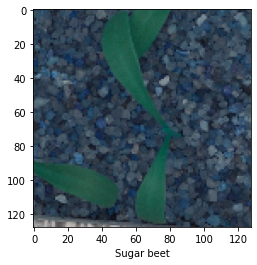

In [ ]:
show(X_test_scaled, y_test, 0)

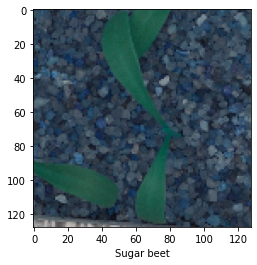

In [ ]:
show(X_test_scaled, y_pred, 0)

In [ ]:
import PIL
def external_img_prediction(path):
  img = PIL.Image.open(path)
  img = np.array(img)
  plt.imshow(img)
  img_resized = np.resize(img,(1,128,128,3))
  img_scaled = img_resized/255
  y_pred = model_cnn.predict(img_scaled)
  

  
  for key, value in labels_dict.items():
    if value == np.argmax(y_pred):
      plt.xlabel(key)



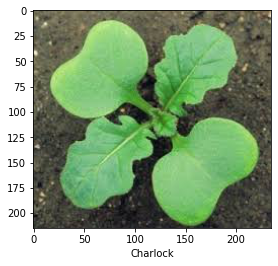

In [ ]:
path_of_external_image = '/content/charloack_latest.jpg'
external_img_prediction(path_of_external_image)